In [38]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
rainfall = pd.read_csv("./cliflow_Niwa_Auckland_data/RainDaily.csv")
rainfall.head()

,Station,Date(NZST),Amount(mm),SofG,Deficit(mm),Runoff(mm),Period(Hrs),Freq
0,3925,20090101:0800,25.0,-,15.5,0.0,24,D
1,3925,20090102:0800,0.2,-,19.6,0.0,24,D
2,3925,20090103:0800,38.4,-,0.0,14.5,24,D
3,3925,20090104:0800,0.6,-,3.7,0.0,24,D
4,3925,20090105:0800,0.0,-,8.1,0.0,24,D


In [40]:
rainfall = rainfall.drop(['Station', 'SofG'], axis=1)
rainfall.set_index('Date(NZST)')
rainfall.index = pd.to_datetime(rainfall.index)
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5352 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000005351
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date(NZST)   5352 non-null   object 
 1   Amount(mm)   5352 non-null   float64
 2   Deficit(mm)  5352 non-null   float64
 3   Runoff(mm)   5352 non-null   float64
 4   Period(Hrs)  5352 non-null   int64  
 5   Freq         5352 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 292.7+ KB


<Axes: xlabel='Period', ylabel='mm'>

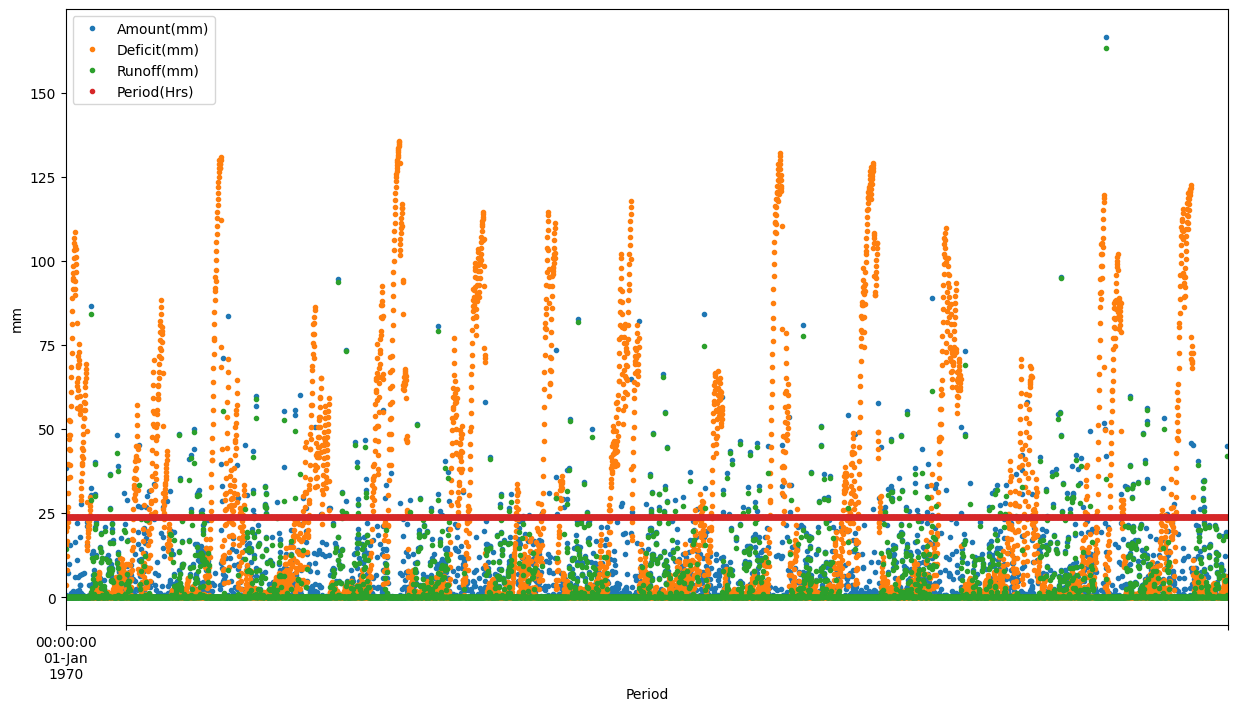

In [41]:
rainfall.plot(style="." , figsize=(15,8), xlabel = "Period", ylabel = "mm")

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

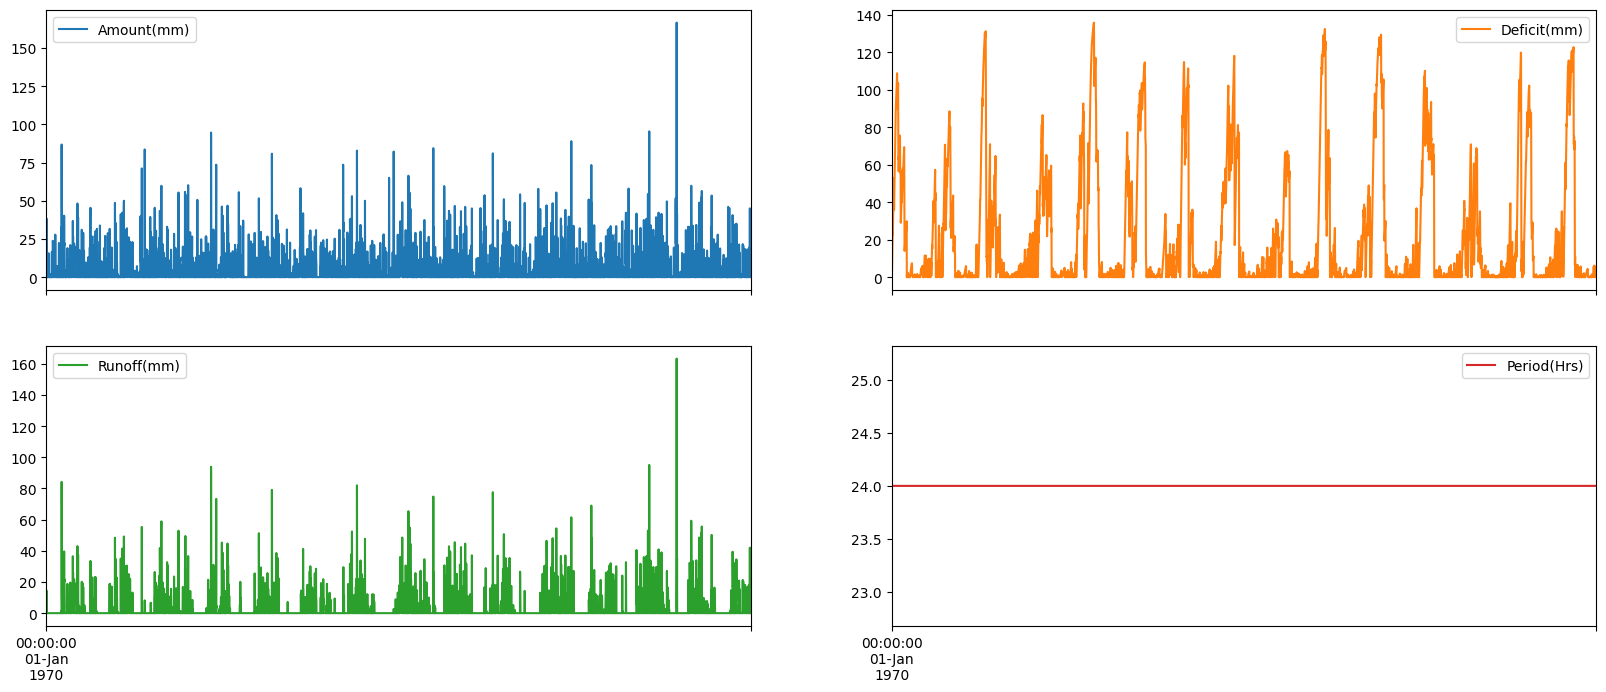

In [42]:
# rainfall_f = rainfall.filter(['Amount(mm)', 'Deficit(mm)', 'Runoff(mm)'], axis=1 )
# print("Precipitation vs Selected Attributes Graph")
# for i in range (rainfall_f.columns.size):
#     plt.subplot(3,2, i+1)
#     plt.scatter("Period(Hrs)", rainfall_f[rainfall_f.values[i][:100]])
#     plt.show()
rainfall.plot(subplots=True, layout=(2,2), figsize=(20,8))


/tmp/ipykernel_7418/1056539661.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = rainfall.corr()


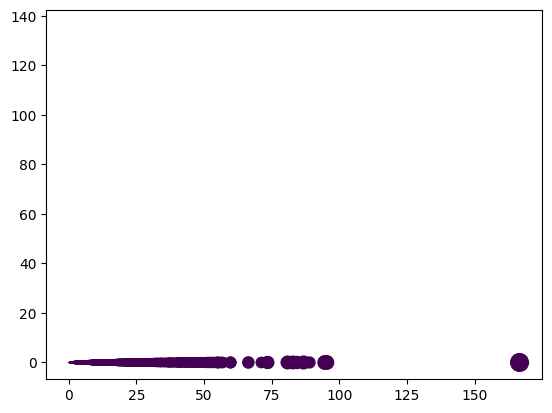

In [43]:
correlation_matrix = rainfall.corr()
plt.scatter(rainfall["Amount(mm)"], rainfall["Deficit(mm)"], rainfall["Runoff(mm)"], rainfall["Period(Hrs)"])


In [44]:
correlation_matrix["Amount(mm)"]

Amount(mm)     1.000000
Deficit(mm)   -0.185437
Runoff(mm)     0.852161
Period(Hrs)         NaN
Name: Amount(mm), dtype: float64

In [45]:
pressure_df = pd.read_csv('./cliflow_Niwa_Auckland_data/Pressure_9am_only.csv')
pressure_df = pressure_df.drop(['Station', 'tend', 'amt(hPa)', 'a24(hPa)'], axis=1)
pressure_df.head()
pd.merge(pressure_df, rainfall)


,Date(NZST),Pmsl(hPa),Pstn(hPa),Amount(mm),Deficit(mm),Runoff(mm),Period(Hrs),Freq
0,20090101:0800,1007.0,983.6,25.0,15.5,0.0,24,D
1,20090102:0800,1012.3,988.5,0.2,19.6,0.0,24,D
2,20090103:0800,1009.0,985.5,38.4,0.0,14.5,24,D
3,20090104:0800,1022.2,998.1,0.6,3.7,0.0,24,D
4,20090105:0800,1022.5,998.6,0.0,8.1,0.0,24,D
...,...,...,...,...,...,...,...,...
5346,20230823:0900,1029.1,1004.5,0.0,2.1,0.0,24,D
5347,20230824:0900,1027.2,1002.7,0.0,3.2,0.0,24,D
5348,20230825:0900,1028.0,1003.3,0.0,4.2,0.0,24,D
5349,20230826:0900,1024.9,1000.5,0.0,5.3,0.0,24,D


In [46]:
radiation_df = pd.read_csv('./cliflow_Niwa_Auckland_data/Radiation_Daily_Global.csv')
rainbreakpoint_df = pd.read_csv("./cliflow_Niwa_Auckland_data/RainBreakpointsfromRainRate.csv")
rainfall_df = pd.read_csv("./cliflow_Niwa_Auckland_data/RainDaily.csv")
soilMoisture_df = pd.read_csv('./cliflow_Niwa_Auckland_data/SoilMoisture.csv')
sunshine_df = pd.read_csv('./cliflow_Niwa_Auckland_data/SunshineDaily.csv')
surfaceWind_df = pd.read_csv('./cliflow_Niwa_Auckland_data/SurfaceWind9am.csv')
temperature_df = pd.read_csv('./cliflow_Niwa_Auckland_data/TemperatureMaxMinDaily.csv')
observationAirTemperature_df = pd.read_csv('./cliflow_Niwa_Auckland_data/TemperatureScreenObs9amOnly.csv')
windMaxGust_df = pd.read_csv('./cliflow_Niwa_Auckland_data/WindMaxGustDaily.csv')

merged_df = [radiation_df, rainbreakpoint_df, rainfall_df, soilMoisture_df, sunshine_df, surfaceWind_df, temperature_df, observationAirTemperature_df, windMaxGust_df]
data = pd.concat(merged_df, join='outer', axis=1)
data.head()


,Station,Date(NZST),Amount(MJ/m2),Period(Hrs),Type,Freq,Station,Date(NZST)_Incl_secs,Amount(mm),Period(min),...,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Station,Date(NZST),Dir(DegT),Speed(m/s),Period(Hrs),Freq
0,3925.0,20090719:2359,3.85,24.0,G,D,3925,20090101:000830,0,8.5,...,NaN,NaN,NaN,NaN,3925.0,20090101:2259,275,9.3,24.0,D
1,3925.0,20090720:2359,4.64,24.0,G,D,3925,20090101:002330,0.16,15.0,...,NaN,NaN,NaN,NaN,3925.0,20090102:2259,44,11.8,24.0,D
2,3925.0,20090721:2359,1.87,24.0,G,D,3925,20090101:011112,0,47.7,...,NaN,NaN,NaN,NaN,3925.0,20090103:2259,13,11.8,24.0,D
3,3925.0,20090722:2359,3.23,24.0,G,D,3925,20090101:012236,0.12,11.4,...,NaN,NaN,NaN,NaN,3925.0,20090104:2259,190,7.7,24.0,D
4,3925.0,20090723:2359,0.77,24.0,G,D,3925,20090101:020436,0,42.0,...,NaN,NaN,NaN,NaN,3925.0,20090105:2259,185,7.2,24.0,D


<Axes: >

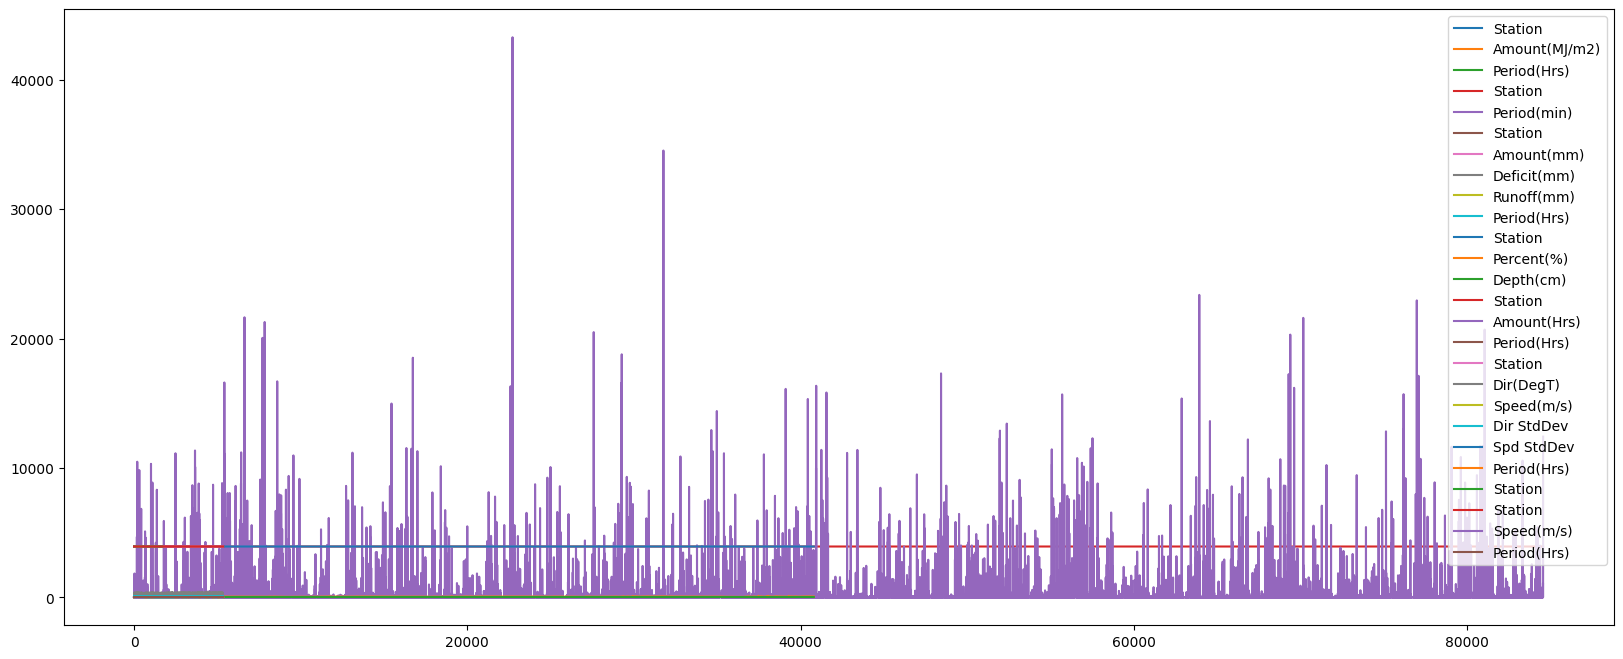

In [47]:
data.plot( figsize=(20,8))

In [48]:
correlation = data.corr()
correlation

/tmp/ipykernel_7418/3106392754.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


,Station,Amount(MJ/m2),Period(Hrs),Station,Period(min),Station,Amount(mm),Deficit(mm),Runoff(mm),Period(Hrs),...,Station,Dir(DegT),Speed(m/s),Dir StdDev,Spd StdDev,Period(Hrs),Station,Station,Speed(m/s),Period(Hrs)
Station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount(MJ/m2),NaN,1.000000,NaN,NaN,-0.046623,NaN,0.005649,0.126762,0.011880,NaN,...,NaN,-0.039759,-0.091473,-0.109348,-0.097511,NaN,NaN,NaN,-0.234788,NaN
Period(Hrs),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Period(min),NaN,-0.046623,NaN,NaN,1.000000,NaN,-0.004822,-0.003175,0.000203,NaN,...,NaN,-0.001034,0.007069,0.012651,0.001736,NaN,NaN,NaN,0.000978,NaN
Station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount(mm),NaN,0.005649,NaN,NaN,-0.004822,NaN,1.000000,-0.185437,0.852161,NaN,...,NaN,-0.049708,0.116329,0.047905,0.130204,NaN,NaN,NaN,0.066125,NaN
Deficit(mm),NaN,0.126762,NaN,NaN,-0.003175,NaN,-0.185437,1.000000,-0.235970,NaN,...,NaN,0.025008,-0.004513,0.013579,-0.007361,NaN,NaN,NaN,0.079899,NaN
Runoff(mm),NaN,0.011880,NaN,NaN,0.000203,NaN,0.852161,-0.235970,1.000000,NaN,...,NaN,-0.037400,0.067108,0.026328,0.075251,NaN,NaN,NaN,0.002551,NaN
Period(Hrs),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
